<a href="https://colab.research.google.com/github/Joab-S/metaheuristica/blob/main/Metaheur%C3%ADstica_RCPSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import math
import random
import time
import itertools
import urllib
import csv

In [ ]:
class RCPSP:
    def __init__(self):
      self.tarefas = []
      self.recursos = 0

    def makespan(self):
      ultima = max( self.tarefas, key=lambda x : x.data + x.duracao)
      if (ultima.data >= 0): makespan = ultima.data+ultima.duracao
      else: makespan = -1
      return makespan

    def __repr__(self):
      return f"Tarefas = {len(self.tarefas)}\tRecursos = {self.recursos}\tMakespan = {self.makespan()}"
    def __str__(self):
      return f"Tarefas = {len(self.tarefas)}\tRecursos = {self.recursos}\tMakespan = {self.makespan()}"

In [ ]:
class Tarefa:
  def __init__(self, id, duracao, consumo):
    self.id = id
    self.duracao = duracao
    self.dependencia = []
    self.consumo = consumo
    self.data = -1

  def __repr__(self):
    return f"[ id ={self.id}, d = {self.duracao}, r = {self.consumo} <-- {self.dependencia}, data={self.data} ]"
  def __str__(self):
    return f"[ id ={self.id}, d = {self.duracao}, r = {self.consumo} <-- {self.dependencia}, data={self.data} ]"


  def adicionar_dependencia(self, i):
    self.dependencia.append(i)

In [ ]:
def marcos_temporais(tarefas):
  """Elabora um conjunto de marcos temporais a partir das datas de início e fim
  das tarefas agendadas."""
  estampas = set()
  estampas.add(0)
  for j in tarefas:
    estampas.add(j.data)
    estampas.add(j.data+j.duracao)
  return sorted(estampas)

def recursos_consumidos(tarefas, tempo):
  """Para um determinado instante de tempo, calcula quantos recursos estão 
  sendo consumidos"""
  rt = 0
  for j in tarefas:
    if (tempo >= j.data and tempo < j.data + j.duracao):
      rt += j.consumo
  return rt

In [ ]:

def gerar_rcpsp(n, recursos, densidade=0.2, rseed=233):
  random.seed(rseed)
  rcpsp = RCPSP()
  rcpsp.tarefas = [Tarefa(j, 1+random.randrange(5), 1+random.randrange(round(recursos*0.7))) for j in range(n)]
  for j in range(n):
    for i in range(j):
      if random.uniform(0,1) < densidade:
        rcpsp.tarefas[j].adicionar_dependencia(i)
  rcpsp.recursos = recursos
  return rcpsp

In [ ]:
gerar_rcpsp(15, 15, 0.35)

Tarefas = 15	Recursos = 15	Makespan = -1

In [ ]:
import copy

def esquema_construtivo(rcpsp):
  """Este esquema constrói um escalonamento de maneira iterativa. A cada passo,
  escolhe uma tarefa que não possua pendências. Então, aloca esta tarefa na data
  mais cedo possível, respeitando as pendências e os recursos."""
  data_mais_cedo = [0 for j in rcpsp.tarefas]
  agendadas = []
  restantes = copy.deepcopy(rcpsp.tarefas)
  while restantes:
    j = escolher_tarefa(restantes)
    alocar_tarefa(j, agendadas, rcpsp.recursos, data_mais_cedo[j.id])
    restantes.remove(j)
    agendadas.append(j)
    for k in restantes:
      if (j.id in k.dependencia):
        k.dependencia.remove(j.id)
        data_mais_cedo[k.id] = max(data_mais_cedo[k.id], j.data + j.duracao)
  for j in agendadas:
    rcpsp.tarefas[j.id].data = j.data
  return rcpsp

def escolher_tarefa(tarefas):
  """Escolhe qualquer tarefa sem pendências."""
  for i in tarefas:
    if (len(i.dependencia) == 0):
      j = i
      break
  return j
     

In [ ]:

def alocar_tarefa(j, tarefas, recursos, inicio):
  """Busca qual o primeiro marco temporal a partir do valor inicio para o qual a
  tarefa j pode ser alocada, sem extrapolar o consumo de recursos."""
  marcos = marcos_temporais(tarefas)
  apartir = lambda x : x >= inicio
  for t in filter(apartir, marcos):
    valido = True
    duracao = lambda x : x >= t and x <= t+j.duracao
    for tp in filter(duracao, marcos):
      if (recursos_consumidos(tarefas, tp) + j.consumo > recursos):
        valido = False
    if (valido):
      j.data = t 
      break

In [ ]:
esquema_construtivo(gerar_rcpsp(15, 15, 0.35))

Tarefas = 15	Recursos = 15	Makespan = 18

In [ ]:
[esquema_construtivo(gerar_rcpsp(15, 15, 0.35)).tarefas[i] for i in range(15)]

[[ id =0, d = 2, r = 9 <-- [], data=0 ],
 [ id =1, d = 2, r = 8 <-- [], data=2 ],
 [ id =2, d = 5, r = 4 <-- [0], data=2 ],
 [ id =3, d = 1, r = 2 <-- [1], data=4 ],
 [ id =4, d = 3, r = 4 <-- [1, 2], data=7 ],
 [ id =5, d = 1, r = 2 <-- [], data=0 ],
 [ id =6, d = 2, r = 10 <-- [], data=5 ],
 [ id =7, d = 2, r = 5 <-- [0, 1], data=7 ],
 [ id =8, d = 1, r = 8 <-- [0, 3, 5], data=9 ],
 [ id =9, d = 3, r = 4 <-- [0, 5, 8], data=10 ],
 [ id =10, d = 1, r = 5 <-- [1, 6, 8], data=10 ],
 [ id =11, d = 4, r = 9 <-- [1, 7, 8], data=11 ],
 [ id =12, d = 2, r = 10 <-- [0, 2, 5, 8, 11], data=15 ],
 [ id =13, d = 3, r = 5 <-- [3, 6, 7], data=13 ],
 [ id =14, d = 1, r = 9 <-- [6, 10], data=17 ]]

In [ ]:
!pip install igraph
import igraph as ig
import seaborn as sns; sns.set(style="white")

def plot_precedencias(rcpsp):
  
  fig, ax = plt.subplots()
  palette = sns.color_palette("colorblind", len(rcpsp.tarefas))

  g = ig.Graph(directed=True);
  g.add_vertices(len(rcpsp.tarefas))
  for j in rcpsp.tarefas:
    for i in rcpsp.tarefas[j.id].dependencia:
      g.add_edge(i, j.id)
  
  g.vs["label"] = [rcpsp.tarefas[x].id for x in range(len(rcpsp.tarefas)) ]
  g.vs["color"] = [palette[rcpsp.tarefas[x].id] for x in range(len(rcpsp.tarefas)) ]
  layout = g.layout(layout='sugiyama', vgap=1.5)
  ig.plot(g,  target=ax,
              bbox=(900, 600),
              mode="directed", 
              vertex_size=0.8, 
              edge_arrow_size=0.02,
              layout=layout)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


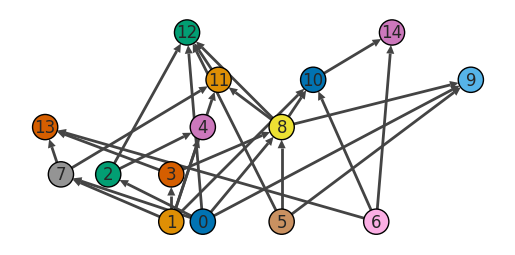

In [ ]:
plot_precedencias(gerar_rcpsp(15, 15, 0.35))

In [ ]:

from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import seaborn as sns; sns.set(style="white")
from matplotlib.ticker import MultipleLocator

def plot_gantt(rcpsp):
  fig, ax = plt.subplots()
  palette = sns.color_palette("colorblind", len(rcpsp.tarefas))
  
  rcpsp.tarefas.sort(key=lambda x : x.data)
  makespan = rcpsp.makespan()
  rc = [ [-1]* makespan for i in range(rcpsp.recursos)]

  for j in rcpsp.tarefas:
    t = j.data
    consumiu = 0
    for r in range(rcpsp.recursos):
      if rc[r][t] == -1:
        for d in range(j.duracao):
          rc[r][t+d] = j.id
        consumiu += 1
      if consumiu == j.consumo: break
  
  for t in range(makespan):
    for r in range(rcpsp.recursos):
      if (rc[r][t] >= 0):
        ax.add_patch(FancyBboxPatch((t, r), 1, 1,
                          boxstyle="round,pad=-0.01,rounding_size=0.10",
                          ec="none", fc=palette[rc[r][t]],
                          mutation_aspect=2 ) )

  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  plt.grid()
  plt.axis('scaled')
  ax.autoscale()

In [ ]:
import copy

def datagem(rcpsp, ordenacao):
  """Percorre as tarefas na ordem especificada pela ordenação reproduzindo as
  operações do algoritmo de esquema construtivo."""
  solucao = RCPSP()
  solucao.recursos = rcpsp.recursos
  data_mais_cedo = [0 for j in rcpsp.tarefas]
  restantes = copy.deepcopy(rcpsp.tarefas)
  pi = 0
  while restantes:
    j = rcpsp.tarefas[ordenacao[pi]]
    alocar_tarefa(j, solucao.tarefas, rcpsp.recursos, data_mais_cedo[j.id])
    restantes = [ x for x in restantes if x.id != j.id ]
    solucao.tarefas.append(copy.deepcopy(j))
    for k in restantes:
      if (j.id in k.dependencia):
        k.dependencia.remove(j.id)
        data_mais_cedo[k.id] = max(data_mais_cedo[k.id], j.data + j.duracao)
    pi = pi + 1
  return solucao

In [ ]:
def testa_topologica(rcpsp, ordenacao):
  """testa se uma ordenação passada obedece todas as devidas relações"""
  top = True
  for j in range(len(ordenacao)-1, 0, -1):
    for i in range(j):
      if (ordenacao[j] in rcpsp.tarefas[ordenacao[i]].dependencia):
        top = False
        break
    if top == False: break
  return top

In [ ]:
def forca_bruta(rcpsp):
    """Gera todas as possíveis ordenções topológicas e data cada uma delas. 
       Então escolhe a menor delas."""
    return min([datagem(rcpsp, x) for x in ordenacoes_topologicas_eficientes(rcpsp) ], key=lambda x : x.makespan() )

todas_as_permutacoes = itertools.permutations
def ordenacoes_topologicas(rcpsp):
  return list(filter(lambda pi : testa_topologica(rcpsp, pi), todas_as_permutacoes(range(len(rcpsp.tarefas)))))

In [ ]:
def ordenacoes_topologicas_eficientes(rcpsp):
    ordenacoes = []
    visitado = []
    grau = []
    for i in range(len(rcpsp.tarefas)):
      visitado.append(False)
      grau.append(len(rcpsp.tarefas[i].dependencia))
    ot_recursiva(rcpsp, ordenacoes, [], visitado, grau)
    return ordenacoes

def ot_recursiva(rcpsp, ordenacoes, ordem, visitado, grau):
  flag = False
  for i in range(len(rcpsp.tarefas)):
    if grau[i] == 0 and not visitado[i]:

      for j in range(i, len(rcpsp.tarefas)):
        if i in rcpsp.tarefas[j].dependencia:
          grau[j] -= 1      
      ordem.append(i)
      visitado[i] = True

      ot_recursiva(rcpsp, ordenacoes, ordem, visitado, grau)
            
      visitado[i] = False
      ordem.pop()
      for j in range(i, len(rcpsp.tarefas)):
        if i in rcpsp.tarefas[j].dependencia:
          grau[j] += 1
            
      flag = True
    
  # Chegamos aqui se todos os vértices forem visitados.
  if not flag:
    ordenacoes.append(ordem.copy())

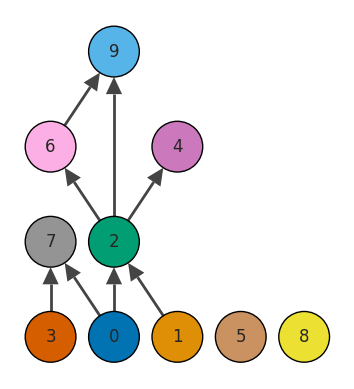

In [ ]:
plot_precedencias(gerar_rcpsp(10, 5, 0.20, rseed=1))

In [ ]:
otcontador = len(ordenacoes_topologicas_eficientes(gerar_rcpsp(10, 5, 0.20, rseed=1)))
print(otcontador, "ordenações topológicas ({0:0.2f}".format(100*otcontador/math.factorial(10)), "%)")

14040 ordenações topológicas (0.39 %)


In [ ]:
forca_bruta(gerar_rcpsp(10, 5, 0.20, rseed=1))

Tarefas = 10	Recursos = 5	Makespan = 17

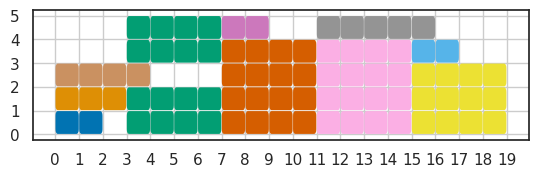

In [ ]:
plot_gantt(datagem(gerar_rcpsp(10, 5, 0.2, rseed=1), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ))

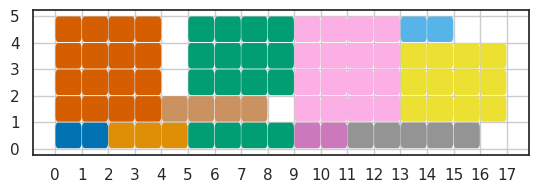

In [ ]:
plot_gantt(forca_bruta(gerar_rcpsp(10, 5, 0.2, rseed=1)))

<h1>SOLUÇÃO DA QUESTÃO UM</h1>


Abaixo criamos o metodo modificar)topologica, que recebe um rcpsp e uma ordenação inicial. A partir disso, alteraremos aleatoriamente entre as posições das tarefas até acharmos uma solução alterada que atende aos requitos de prioridades e ordenação das farefas.

In [ ]:
def modificar_topologica(rcpsp, ordenacao):
    nova_ordem = ordenacao.copy()

    # Escolhe aleatoriamente duas tarefas consecutivas para trocar de posição
    i = random.randint(0, len(ordenacao)-2)
    j = i+1

    # Tenta trocar mais de duas tarefas de posição aleatoriamente
    n = random.randint(2, min(5, len(ordenacao)-i))
    indices = random.sample(range(i, len(ordenacao)), n)
    indices.sort()
    for k in range(n-1):
        nova_ordem[indices[k]], nova_ordem[indices[k+1]] = nova_ordem[indices[k+1]], nova_ordem[indices[k]]

    # Testa se a nova ordenação é válida
    if testa_topologica(rcpsp, nova_ordem):
        return nova_ordem
    else:
        # Se a nova ordenação não for válida, tenta novamente com outra combinação
        return modificar_topologica(rcpsp, ordenacao)

 <h1> SOLUÇÃO DA QUESTÃO DOIS </h1>


 Uma vez implementado o método nodificar_topologica, podemos escrever o método heuristica_RCPSP, que recebe um rcpsp, uma quantiade maxima de iteraçõoes, temperatura final e incial e um valor pra alfa.
 
 A partir de uma solução inicial escolhida aleatoriamente de ordenacoes_topologicas_eficientes, nós geramos uma solulção nova pelo uso do nosso método modificar_topologica criada anteriomente. Existe uma certa probabilidade que deternima se a alteração é feita ou não, e assim os valores de melhor_solucao são alterados, e após um máximo de iterações, a função retornar um valor de solução ótima.

In [ ]:
def heuristica_RCPSP(rcpsp, max_iter=1000, temp_inicial=10000, temp_final=0.1, alpha=0.99):
    """
    Parâmetros:
    - rcpsp: objeto RCPSP com as informações do problema
    - max_iter: número máximo de iterações
    - temp_inicial: temperatura inicial
    - temp_final: temperatura final
    - alpha: fator de resfriamento

    Retorno:
    - Objeto Datagem com o resultado encontrado pelo algoritmo.
    """

    # Busca uma solução inicial aleatória
    ote = ordenacoes_topologicas_eficientes(rcpsp)
    solucao_atual = ote[random.randint(0,len(ote))]
    melhor_solucao = solucao_atual
    temperatura = temp_inicial
    
    for i in range(max_iter):
        # Gera uma nova solução a partir da atual
        nova_solucao = modificar_topologica(rcpsp, solucao_atual)
        
        # Calcula a diferença de custo entre a nova solução e a atual
        delta_custo = datagem(rcpsp, nova_solucao).makespan() - datagem(rcpsp, solucao_atual).makespan()
        
        # Se a nova solução for melhor, atualiza a solução atual e a melhor solução
        if delta_custo < 0:
            solucao_atual = nova_solucao
            melhor_solucao = nova_solucao
        # Se a nova solução for pior, aceita com uma probabilidade controlada pela temperatura
        else:
            probabilidade = math.exp(-delta_custo/temperatura)
            if random.uniform(0, 1) < probabilidade:
                solucao_atual = nova_solucao
        
        # Diminui a temperatura
        temperatura = temperatura * alpha
        
        # Para o loop se a temperatura atingir o valor final
        if temperatura < temp_final:
            break
            
    return datagem(rcpsp, melhor_solucao)

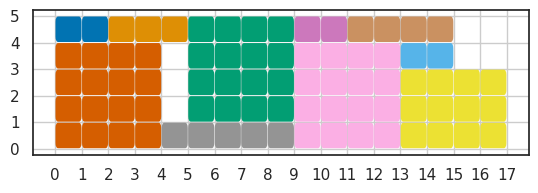

In [ ]:
plot_gantt(heuristica_RCPSP(gerar_rcpsp(10, 5, 0.2, rseed=1), max_iter=100, temp_inicial=10, temp_final=1, alpha=0.9))